In [49]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
#locate pyACC
sys.path.append("/Users/pietromongiardini/Astrocompu/astrocosmolib/")
from pyACC.fits_wrapper import FitsManager
from astropy.cosmology import LambdaCDM
from astropy import units as u

In [50]:
#Set up different cosmologies
fiducial_cosmology = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [51]:
redshift = 1.0
dc=fiducial_cosmology.comoving_distance(redshift)

In [52]:
dc.to(u.km)

<Quantity 1.01945505e+23 km>

Lettura del catalogo

In [53]:
vipers_sample=FitsManager("VIPERS_W1_SPECTRO_PDR2.fits.gz")

2025-06-25 22:21:55.360460 :: FitsManager :: INFO :: Fits file opened successfully 


In [54]:
vipers_sample.get_header(1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   91 / width of table in bytes                        
NAXIS2  =                60528 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   16 / number of fields in each row                   
TTYPE1  = 'id_IAU  '           / label for field   1                            
TFORM1  = '16A     '           / data format of field: ASCII Character          
TTYPE2  = 'num     '           / label for field   2                            
TFORM2  = '9A      '           / data format of field: ASCII Character          
TTYPE3  = 'alpha   '        

In [55]:
data=vipers_sample.get_data(1)

In [56]:
alpha, delta, redshift = data['ALPHA'], data['DELTA'], data['zspec']
zflg=data['zflg']

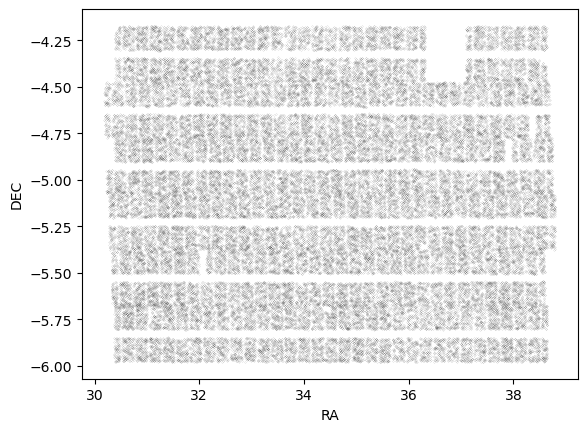

In [57]:
#plot the angular distribution of the galaxies
plt.plot(alpha, delta, 'k.', markersize=0.1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

(array([2.3241e+04, 3.3668e+04, 0.0000e+00, 2.1200e+03, 5.7000e+01,
        4.6200e+02, 1.6900e+02, 0.0000e+00, 1.4800e+02, 3.0600e+02,
        2.8900e+02, 0.0000e+00, 5.5000e+01, 1.1000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

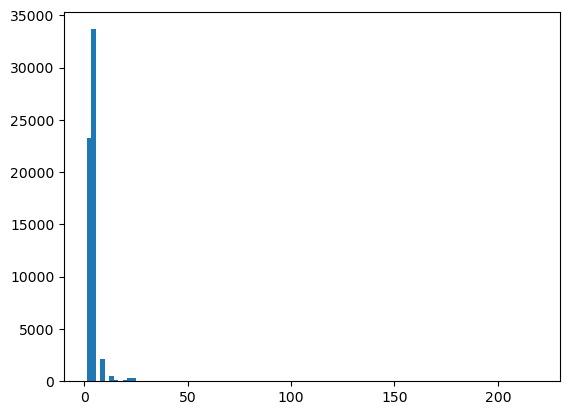

In [58]:
#Check z flag
plt.hist(zflg, bins=100)

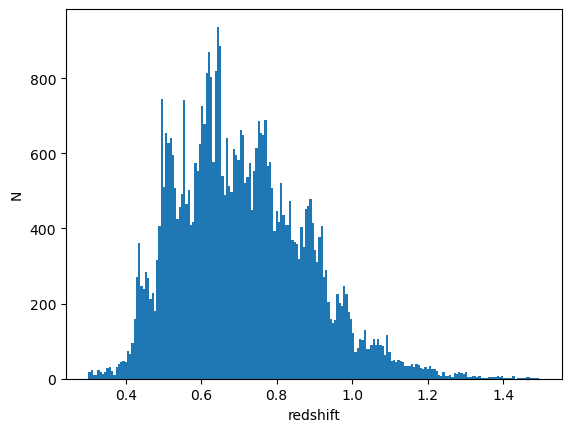

In [59]:
cut_zspec = np.where((redshift>0.3)&(redshift<1.5)&(zflg>=2) & (zflg<=9))[0]
len(cut_zspec), len(redshift)
plt.hist(redshift[cut_zspec], bins=200)
plt.xlabel('redshift')
plt.ylabel('N')
plt.show()

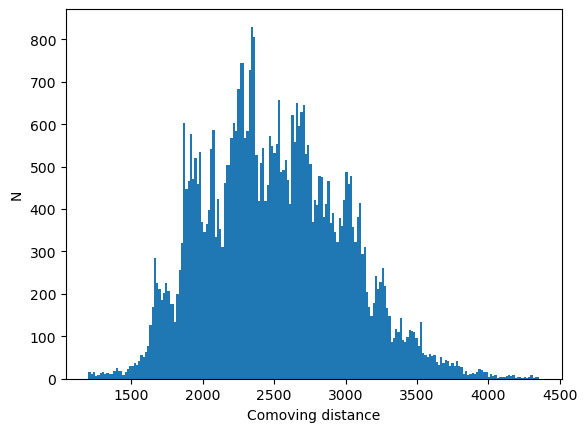

In [60]:
#Convert redshift to comoving distance
dc=fiducial_cosmology.comoving_distance(redshift[cut_zspec])
X= dc*np.cos(np.radians(delta[cut_zspec]))*np.cos(np.radians(alpha[cut_zspec]))
Y= dc*np.cos(np.radians(delta[cut_zspec]))*np.sin(np.radians(alpha[cut_zspec]))
Z= dc*np.sin(np.radians(delta[cut_zspec]))
plt.hist(dc, bins=200)
plt.xlabel('Comoving distance')
plt.ylabel('N')
plt.show()

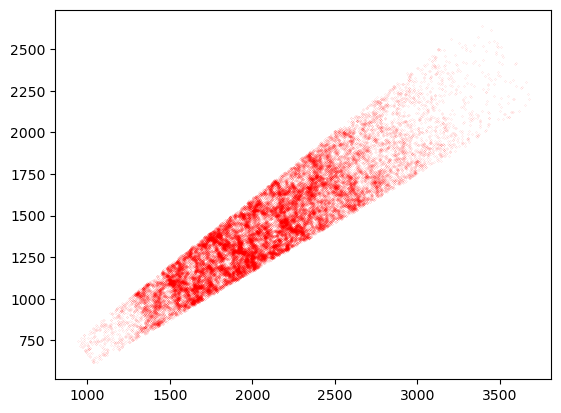

In [61]:
plt.plot(X,Y, 'r.', markersize=0.1)

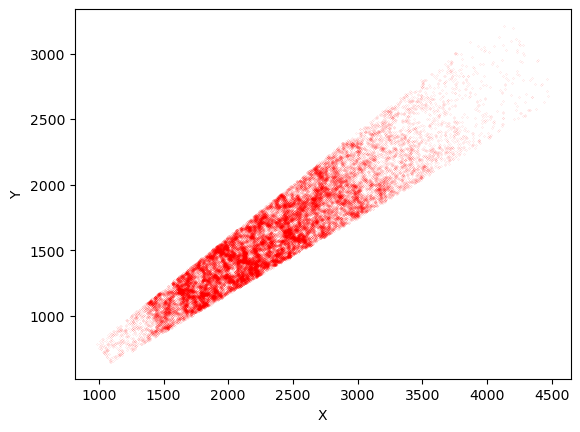

In [62]:
fiducial_cosmology_2=LambdaCDM(H0=70, Om0=0.1, Ode0=0.9)
dc_2=fiducial_cosmology_2.comoving_distance(redshift[cut_zspec])
X_2= dc_2*np.cos(np.radians(delta[cut_zspec]))*np.cos(np.radians(alpha[cut_zspec]))
Y_2= dc_2*np.cos(np.radians(delta[cut_zspec]))*np.sin(np.radians(alpha[cut_zspec]))
Z_2= dc_2*np.sin(np.radians(delta[cut_zspec]))
plt.plot(X_2,Y_2, 'r.', markersize=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [63]:
fiducial_cosmology = LambdaCDM(H0=70, Om0=0.5, Ode0=0.5)

dc3=fiducial_cosmology.comoving_distance(redshift[cut_zspec])

X3 = dc3 * np.cos(np.radians(delta[cut_zspec])) * np.cos(np.radians(alpha[cut_zspec]))
Y3 = dc3 * np.cos(np.radians(delta[cut_zspec])) * np.sin(np.radians(alpha[cut_zspec]))
Z3 = dc3 * np.sin(np.radians(delta[cut_zspec]))

<>:25: SyntaxWarning: invalid escape sequence '\O'
<>:26: SyntaxWarning: invalid escape sequence '\O'
<>:25: SyntaxWarning: invalid escape sequence '\O'
<>:26: SyntaxWarning: invalid escape sequence '\O'
/var/folders/xy/lbzxg6rn2xzgh0qsqvgchmz40000gn/T/ipykernel_5047/3227393368.py:25: SyntaxWarning: invalid escape sequence '\O'
  ax[1,1].hist(dc_2, bins=100, color="r", alpha=0.5, label="$\Omega_M=0.1$")
/var/folders/xy/lbzxg6rn2xzgh0qsqvgchmz40000gn/T/ipykernel_5047/3227393368.py:26: SyntaxWarning: invalid escape sequence '\O'
  ax[1,1].hist(dc3, bins=100, color="b", alpha=0.5, label="$\Omega_M=0.5$")


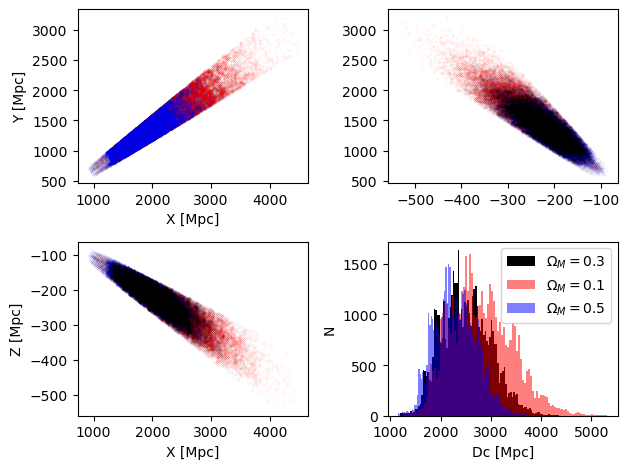

In [64]:
figure, ax = plt.subplots(2, 2)

ax[0,0].plot(X, Y, ".", ms=0.05, color="k")
ax[0,0].plot(X_2, Y_2, ".", ms=0.05, color="r")
ax[0,0].plot(X3, Y3, ".", ms=0.05, color="b")

ax[0,0].set_xlabel("X [Mpc]")
ax[0,0].set_ylabel("Y [Mpc]")

ax[0,1].plot(Z_2, Y_2, ".", ms=0.05, color="r")
ax[0,1].plot(Z3, Y3, ".", ms=0.05, color="b")
ax[0,1].plot(Z, Y, ".", ms=0.05, color="k")

ax[1,0].set_xlabel("Z [Mpc]")
ax[1,0].set_ylabel("Y [Mpc]")

ax[1,0].plot(X_2, Z_2, ".", ms=0.05, color="r")
ax[1,0].plot(X3, Z3, ".", ms=0.05, color="b")
ax[1,0].plot(X, Z, ".", ms=0.05, color="k")

ax[1,0].set_xlabel("X [Mpc]")
ax[1,0].set_ylabel("Z [Mpc]")

ax[1,1].hist(dc, bins=100, color="k", label=r"$\Omega_M=0.3$")
ax[1,1].hist(dc_2, bins=100, color="r", alpha=0.5, label="$\Omega_M=0.1$")
ax[1,1].hist(dc3, bins=100, color="b", alpha=0.5, label="$\Omega_M=0.5$")

ax[1,1].set_xlabel("Dc [Mpc]")
ax[1,1].set_ylabel("N")

ax[1,1].legend()

figure.tight_layout()